In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm, gamma, t # 1次元ガウス分布, ガンマ分布, 1次元スチューデントのt分布


## 1次元ガウス分布の学習と予測：平均・精度が未知の場合
教科書3.3.3節を再現します。

scipy.stats.norm の使い方の詳細はURL参照
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


10.0


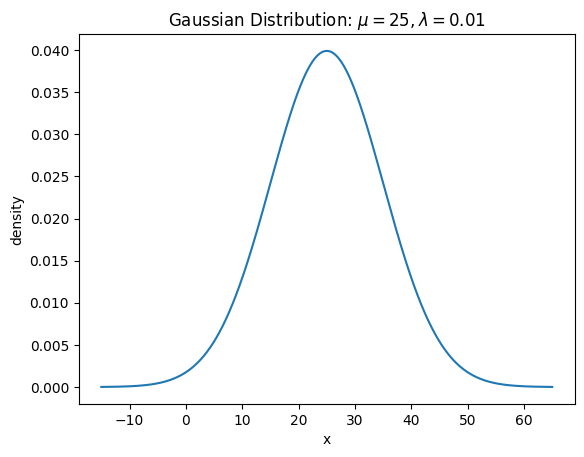

In [2]:
# 真のパラメータを指定
mu_truth = 25
lambda_truth = 0.01
print(np.sqrt(1 / lambda_truth)) # 標準偏差

# 作図用のxの値を設定
x_line = np.linspace(
    mu_truth - 4 * np.sqrt(1 / lambda_truth),
    mu_truth + 4 * np.sqrt(1 / lambda_truth),
    num=1000
)

# 尤度を計算:式(2.64)
# ln_C_N = - 0.5 *(np.log(2 * np.pi) - np.log(lambda_truth)) # 正規化項(対数)
# true_model = np.exp(ln_C_N - 0.5 * lambda_truth * (x_line - mu_truth)**2) # 確率密度
true_model = norm.pdf(x=x_line, loc=mu_truth, scale=np.sqrt(1 / lambda_truth)) # 確率密度 loc: 平均 (デフォルト:0), scale: 標準偏差 (デフォルト:1)

# 尤度を作図
plt.figure()
plt.plot(x_line, true_model) # 尤度
plt.xlabel('x')
plt.ylabel('density')
plt.title('Gaussian Distribution: $\mu=' + str(mu_truth) + ', \lambda=' + str(lambda_truth) + '$')
plt.show()

[45.64806939 21.78279366 40.86904488 10.21687039 29.34814557]


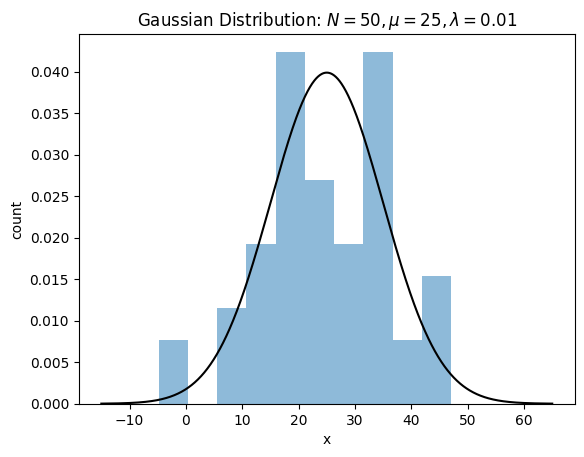

In [3]:
## 観測データの生成

# データ数を指定
N = 50

# ガウス分布に従うデータを生成
x_n = np.random.normal(loc=mu_truth, scale=np.sqrt(1 / lambda_truth), size=N)
print(x_n[:5]) # ndarray の先頭5個を表示

# 観測データのヒストグラムを作図
plt.figure()
plt.plot(x_line, true_model, color="black") # 尤度
plt.hist(x=x_n, density=True, alpha=0.5) # 観測データ
plt.xlabel('x')
plt.ylabel('count') # x軸目盛
plt.title('Gaussian Distribution: $N=' + str(N) + ', \mu=' + str(mu_truth) + ', \lambda=' + str(lambda_truth) + '$')
plt.show()

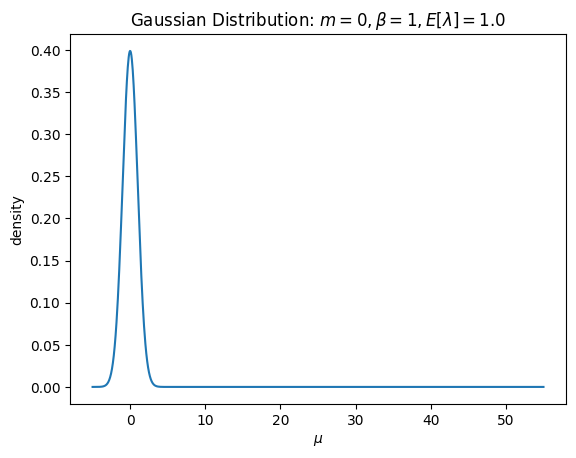

In [4]:
## 事前分布(ガウス・ガンマ分布)の設定

# muの事前分布のパラメータを指定
m = 0
beta = 1

# lambdaの事前分布のパラメータを指定
a = 1
b = 1

# lambdaの期待値を計算:式(2.59)
E_lambda = a / b

# 作図用のmuの値を設定 (ちょっと横着して正解から当たりをつけている)
mu_line = np.linspace(mu_truth - 30, mu_truth + 30, num=1000)

# muの事前分布を計算:式(2.64)
#ln_C_N = - 0.5 * (np.log(2 * np.pi) - np.log(beta * E_lambda)) # 正規化項(対数)
#prior = np.exp(ln_C_N - 0.5 * beta * E_lambda * (mu_line - m)**2) # 確率密度

# muの事前分布を計算:SciPy ver
prior = norm.pdf(x=mu_line, loc=m, scale=np.sqrt(1 / beta / E_lambda)) # 確率密度

plt.figure()
plt.plot(mu_line, prior, label='$\mu$ prior') # muの事前分布
plt.xlabel('$\mu$')
plt.ylabel('density')
plt.title('Gaussian Distribution: $m=' + str(m) + ', \\beta=' + str(beta) + ', E[\lambda]=' + str(np.round(E_lambda, 3)) + '$')
plt.show()

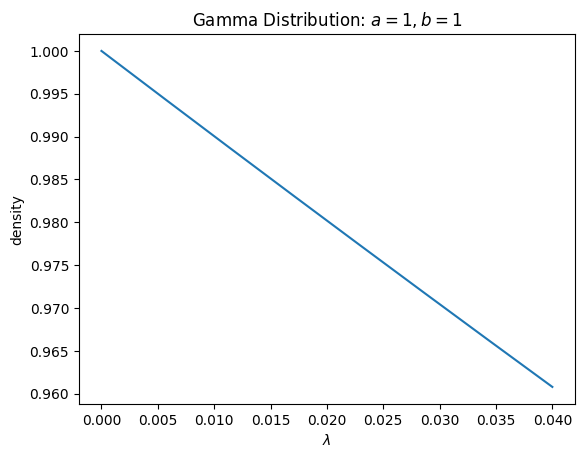

In [5]:
# 作図用のlambdaの値を設定
lambda_line = np.linspace(0, 4 * lambda_truth, num=1000)

# lambdaの事前分布を計算:式(2.56)
#ln_C_Gam = a * np.log(b) - math.lgamma(a) # 正規化項(対数)
#prior_lambda = np.exp(ln_C_Gam + (a - 1) * np.log(lambda_line) - b * lambda_line) # 確率密度

# lambdaの事前分布を計算:SciPy ver
prior_lambda = gamma.pdf(x=lambda_line, a=a, scale=1 / b) # 確率密度

# lambdaの事前分布を作図
plt.figure()
plt.plot(lambda_line, prior_lambda, label='$\lambda$ prior') # lambdaの事前分布
plt.xlabel('$\lambda$')
plt.ylabel('density')
plt.title('Gamma Distribution: $a=' + str(a) + ', b=' + str(b) + '$')
plt.show()

51
24.137116879024415
26.0
3478.78056993885
0.007473883298266504


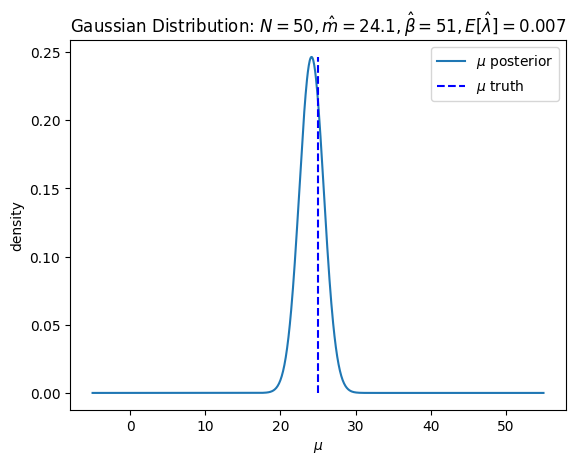

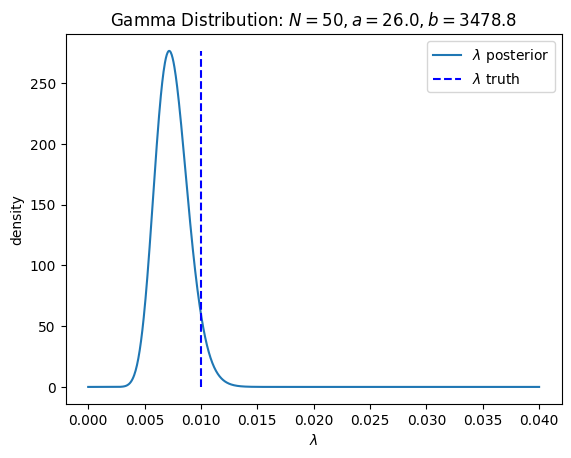

In [6]:
# 事後分布(ガウス・ガンマ分布)のパラメータを計算

# muの事後分布のパラメータを計算: 式(3.83)
beta_hat = N + beta
m_hat = (np.sum(x_n) + beta * m) / beta_hat
print(beta_hat)
print(m_hat)

# lambdaの事後分布のパラメータを計算: 式(3.88)
a_hat = 0.5 * N + a
b_hat = 0.5 * (np.sum(x_n**2) + beta * m**2 - beta_hat * m_hat**2) + b
print(a_hat)
print(b_hat)

# lambdaの期待値を計算: 式(2.59)
E_lambda_hat = a_hat / b_hat
print(E_lambda_hat)

# muの事後分布を計算:式(2.64)
#ln_C_N = - 0.5 * (np.log(2 * np.pi) - np.log(beta_hat * E_lambda_hat)) # 正規化項(対数)
#posterior_mu = np.exp(ln_C_N - 0.5 * beta_hat * E_lambda_hat * (mu_line - m_hat)**2) # 確率密度
# lambdaの事後分布の計算:式(2.56)
#ln_C_Gam = a_hat * np.log(b_hat) - math.lgamma(a_hat) # 正規化項(対数)
#posterior_lambda = np.exp(ln_C_Gam + (a_hat - 1) * np.log(lambda_line) - b_hat * lambda_line) # 確率密度

# SciPy ver.
# muの事前分布を計算
posterior_mu = norm.pdf(x=mu_line, loc=m_hat, scale=np.sqrt(1 / beta_hat / E_lambda_hat))
# lambdaの事前分布を計算
posterior_lambda = gamma.pdf(x=lambda_line, a=a_hat, scale=1 / b_hat)

# muの事後分布を作図
plt.figure()
plt.plot(mu_line, posterior_mu, label='$\mu$ posterior') # muの事後分布
plt.vlines(x=mu_truth, ymin=0, ymax=max(posterior_mu), label='$\mu$ truth', color='blue', linestyle='--') # 真のmu
plt.xlabel('$\mu$')
plt.ylabel('density')
plt.title('Gaussian Distribution: $N=' + str(N) + ', \hat{m}=' + str(np.round(m_hat, 1)) + ', \hat{\\beta}=' + str(beta_hat) + ', E[\hat{\lambda}]=' + str(np.round(E_lambda_hat, 3)) + '$')
plt.legend()
plt.show()

# lambdaの事後分布を作図
plt.figure()
plt.plot(lambda_line, posterior_lambda, label='$\lambda$ posterior') # lambdaの事後分布
plt.vlines(x=lambda_truth, ymin=0, ymax=max(posterior_lambda), label='$\lambda$ truth', color='blue', linestyle='--') # 真のlambda
plt.xlabel('$\lambda$')
plt.ylabel('density')
plt.title('Gamma Distribution: $N=' + str(N) + ', a=' + str(a_hat) + ', b=' + str(np.round(b_hat, 1)) + '$')
plt.legend()
plt.show()

24.137116879024415
0.00733015477329984
0.00733015477329984


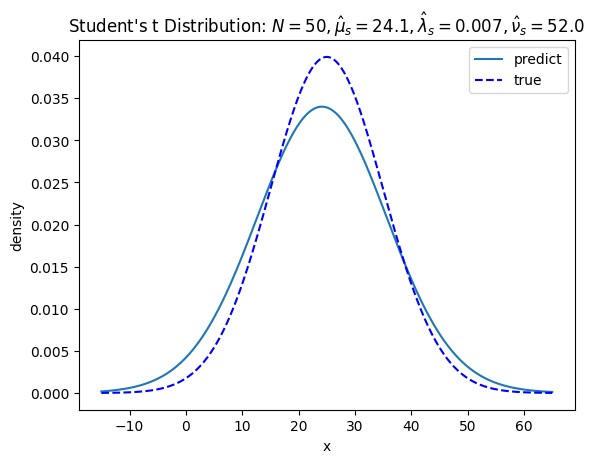

In [7]:
# 予測分布のパラメータを計算:式(3.95')
mu_s_hat = m_hat
lambda_s_hat = beta_hat * a_hat / (1 + beta_hat) / b_hat
nu_s_hat = 2 * a_hat
mu_s_hat = (np.sum(x_n) + beta_hat * m) / (N + beta)

#numer_lambda = (N + beta) * (0.5 * N + a)
#denom_lambda = (N + 1 + beta) * (0.5 * (np.sum(x_n**2) + beta + m**2 - beta_hat * m_hat**2) + beta)
#lambda_s_hat = numer_lambda / denom_lambda
#nu_s_hat = N + 2 * a

print(mu_s_hat)
print(lambda_s_hat)
print(lambda_s_hat)

# 予測分布を計算:式(3.76)
#ln_C_St = math.lgamma(0.5 * (nu_s_hat + 1)) - math.lgamma(0.5 * nu_s_hat) # 正規化項(対数)
#ln_term1 = 0.5 * np.log(lambda_s_hat / np.pi / nu_s_hat)
#ln_term2 = - 0.5 * (nu_s_hat + 1) * np.log(1 + lambda_s_hat / nu_s_hat * (x_line - mu_s_hat)**2)
#predict = np.exp(ln_C_St + ln_term1 + ln_term2) # 確率密度
# 予測分布を計算:SciPy ver
predict = t.pdf(x=x_line, df=nu_s_hat, loc=mu_s_hat, scale=np.sqrt(1 / lambda_s_hat))

# 予測分布を作図
plt.figure()
plt.plot(x_line, predict, label='predict') # 予測分布
plt.plot(x_line, true_model, label='true', color='blue', linestyle='--') # 真の分布
plt.xlabel('x')
plt.ylabel('density')
plt.title('Student\'s t Distribution: $N=' + str(N) + ', \hat{\mu}_s=' + str(np.round(mu_s_hat, 1)) + ', \hat{\lambda}_s=' + str(np.round(lambda_s_hat, 3)) + ', \hat{\\nu}_s=' + str(nu_s_hat) + '$')
plt.legend()
plt.show()


In [8]:
# lambdaの事前分布のパラメータを指定
a = 1
b = 1

# lambdaの期待値を計算:式(2.59)
E_lambda = a / b

# 初期値による予測分布のパラメータを計算:式(3.95)
mu_s = m
lambda_s = beta * a / (1 + beta) / b
nu_s = 2 * a

# 作図用のxの値を設定
x_line = np.linspace(
    mu_truth - 4 * np.sqrt(1 / lambda_truth),
    mu_truth + 4 * np.sqrt(1 / lambda_truth),
    num=1000
)
# 作図用のmuの値を設定
mu_line = np.linspace(mu_truth - 50, mu_truth + 50, num=1000)
# 作図用のlambdaの値を設定
lambda_line = np.linspace(0, 4 * lambda_truth, num=1000)

# データ数(試行回数)を指定
N = 100

# 推移の記録用の受け皿を初期化
x_n = np.empty(N)
log_m = [m]
log_beta = [beta]
log_posterior_mu = [norm.pdf(x=mu_line, loc=m, scale=np.sqrt(1 / beta / E_lambda))]
log_a = [a]
log_b = [b]
log_posterior_lambda = [gamma.pdf(x=lambda_line, a=a, scale=1 / b)]
log_mu_s = [mu_s]
log_lambda_s = [lambda_s]
log_nu_s = [nu_s]
log_predict = [t.pdf(x=x_line, df=nu_s, loc=mu_s, scale=np.sqrt(1 / lambda_s))]

# ベイズ推論
for n in range(N):
    # ガウス分布に従うデータを生成
    x_n[n] = np.random.normal(loc=mu_truth, scale=np.sqrt(1 / lambda_truth), size=1)

    # muの事後分布のパラメータを更新:式(3.83)
    old_beta = beta
    old_m = m
    beta += 1
    m = (x_n[n] + old_beta * m) / beta

    # lambdaの事後分布のパラメータを更新:式(3.88)
    a += 0.5
    b += 0.5 * (x_n[n]**2 + old_beta * old_m**2 - beta * m**2)

    # lambdaの期待値を計算:式(2.59)
    E_lambda = a / b

    # muの事前分布を計算:式(2.64)
    log_posterior_mu.append(
        norm.pdf(x=mu_line, loc=m, scale=np.sqrt(1 / beta / E_lambda))
    )

    # lambdaの事前分布を計算:式(2.56)
    log_posterior_lambda.append(gamma.pdf(x=lambda_line, a=a, scale=1 / b))

    # 予測分布のパラメータを更新:式(3.95)
    mu_s = m
    lambda_s = beta * a / (1 + beta) / b
    nu_s = 2 * a

    # 予測分布を計算:式(3.76)
    log_predict.append(t.pdf(x=x_line, df=nu_s, loc=mu_s, scale=np.sqrt(1 / lambda_s)))

    # 超パラメータを記録
    log_m.append(m)
    log_beta.append(beta)
    log_a.append(a)
    log_b.append(b)
    log_mu_s.append(mu_s)
    log_lambda_s.append(lambda_s)
    log_nu_s.append(nu_s)

<ipython-input-8-0cac9ca4092b>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_n[n] = np.random.normal(loc=mu_truth, scale=np.sqrt(1 / lambda_truth), size=1)


In [9]:
# 上にバラバラに買いていた作図コマンドを関数に分離

# muの事後分布の作図処理を関数として定義
def plot_posterior_mu(n, log_posterior_mu, log_m, log_beta, mu_truth):
    mu_line = np.linspace(mu_truth - 50, mu_truth + 50, num=1000)

    plt.figure()
    # nフレーム目のmuの事後分布を作図
    plt.plot(mu_line, log_posterior_mu[n], label='$\mu$ posterior') # muの事後分布
    plt.vlines(x=mu_truth, ymin=0, ymax=np.nanmax(log_posterior_mu), label='$\mu$ trurh', color='blue', linestyle='--') # 真のmu
    plt.xlabel('$\mu$')
    plt.ylabel('density')
    plt.title('Gaussian Distribution: $N=' + str(n) + ', \hat{m}=' + str(np.round(log_m[n], 1)) + ', \hat{\\beta}=' + str(log_beta[n]) + '$')
    plt.legend()
    plt.show()

# 作図処理を関数として定義
def plot_posterior_lambda(n, log_posterior_lambda, log_a, log_b, lambda_truth):
    lambda_line = np.linspace(0, 4 * lambda_truth, num=1000)

    plt.figure()
    # nフレーム目のlambdaの事後分布を作図
    plt.plot(lambda_line, log_posterior_lambda[n], label='$\lambda$ posterior') # lambdaの事後分布
    plt.vlines(x=lambda_truth, ymin=0, ymax=np.nanmax(log_posterior_lambda), label='$\lambda$ trurh', color='blue', linestyle='--') # 真のlambda
    plt.xlabel('$\lambda$')
    plt.ylabel('density')
    plt.title('Gamma Distribution: $N=' + str(n) + ', \hat{a}=' + str(log_a[n]) + ', \hat{b}=' + str(np.round(log_b[n], 1)) + '$')
    plt.legend()

# 作図処理を関数として定義
def plot_predict(n, log_predict, log_mu_s, log_lambda_s, log_nu_s, true_model):
    x_line = np.linspace(
        mu_truth - 4 * np.sqrt(1 / lambda_truth),
        mu_truth + 4 * np.sqrt(1 / lambda_truth),
        num=1000)

    plt.figure()
    # nフレーム目の予測分布を作図
    plt.plot(x_line, log_predict[n], label='predict') # 予測分布
    plt.plot(x_line, true_model, label='true', color='blue', linestyle='--') # 真の分布
    plt.xlabel('x')
    plt.ylabel('density')
    plt.title('Student\'s t Distribution: $N=' + str(n) + ', \hat{\mu}_s=' + str(np.round(log_mu_s[n], 1)) + ', \hat{\lambda}_s=' + str(np.round(log_lambda_s[n], 3)) + ', \hat{\\nu}_s=' + str(log_nu_s[n]) + '$', loc='left')
    plt.ylim(0, np.nanmax(log_predict))
    plt.legend()

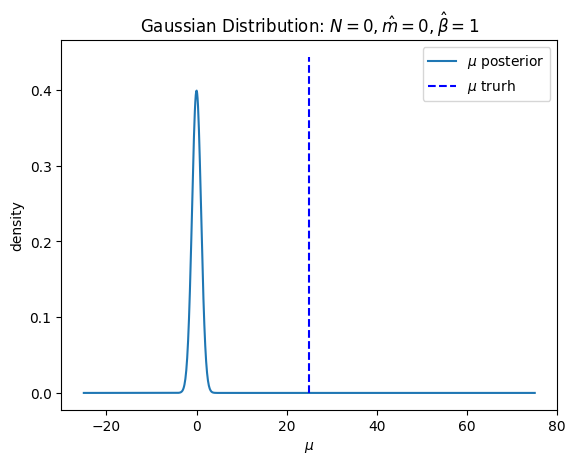

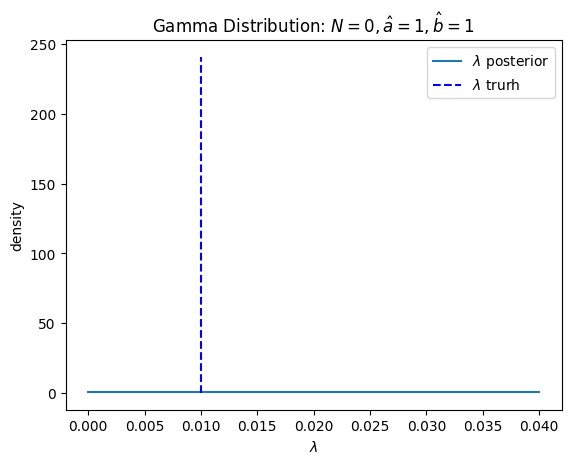

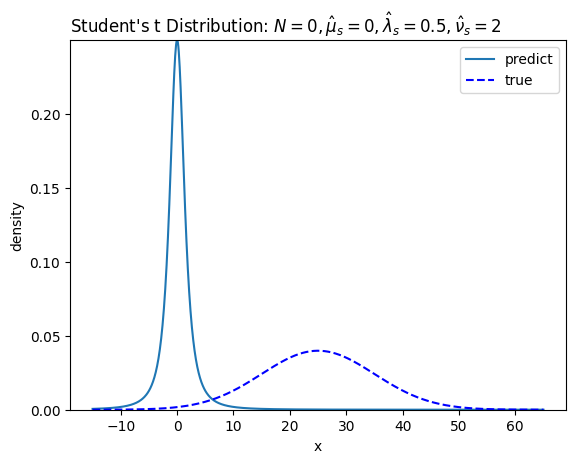

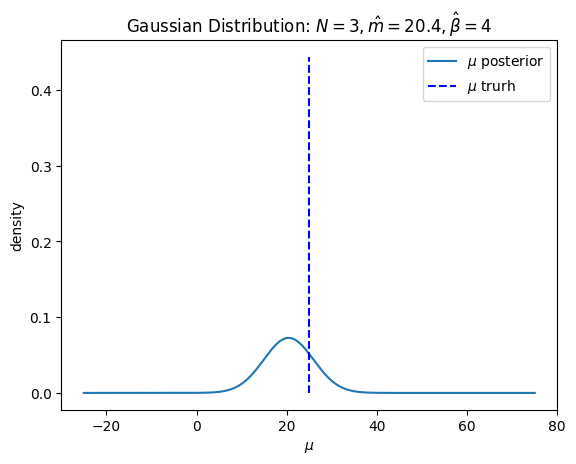

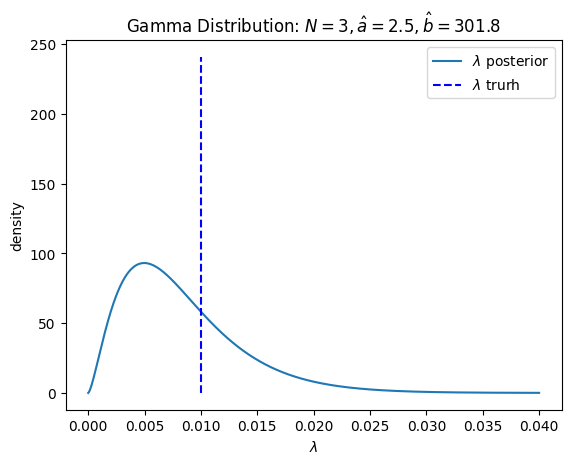

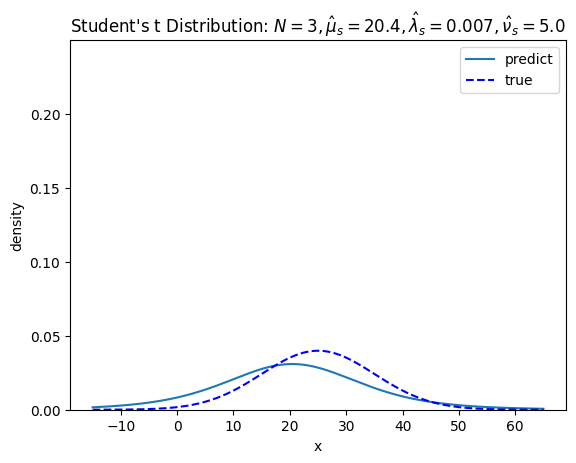

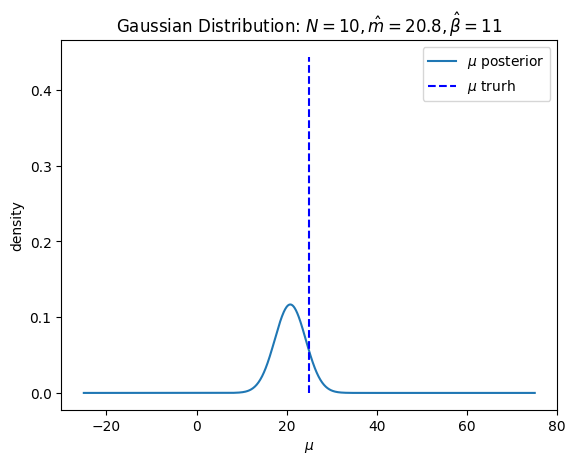

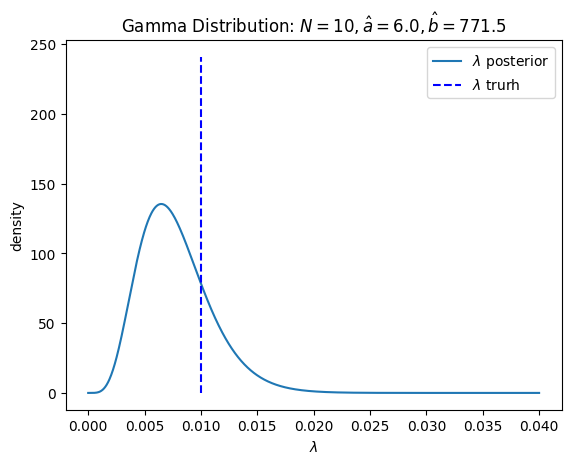

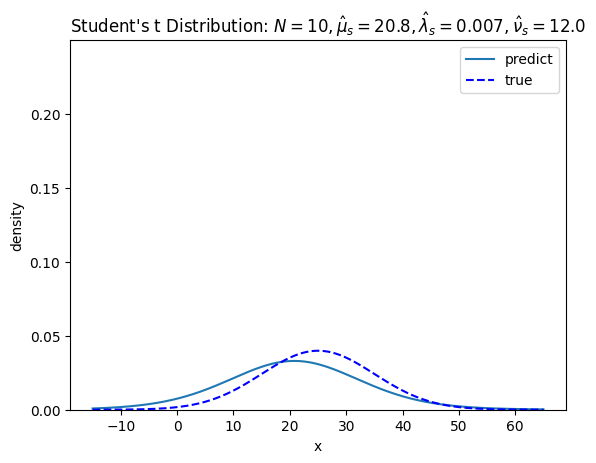

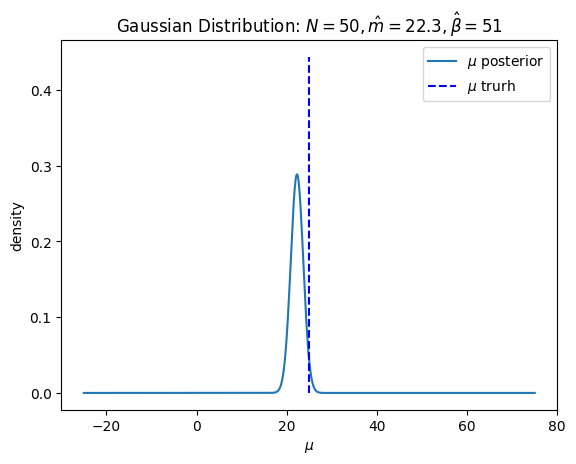

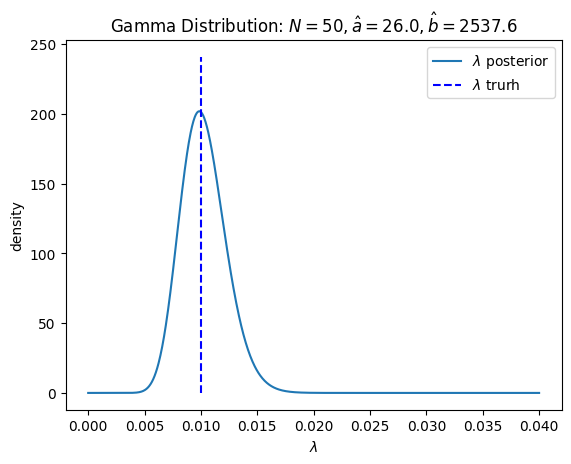

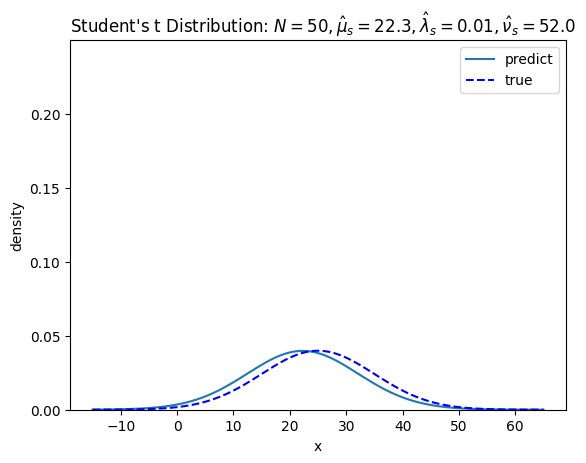

In [10]:
for i in [0, 3, 10, 50]:
    plot_posterior_mu(i, log_posterior_mu, log_m, log_beta, mu_truth)
    plot_posterior_lambda(i, log_posterior_lambda, log_a, log_b, lambda_truth)
    plot_predict(i, log_predict, log_mu_s, log_lambda_s, log_nu_s, true_model)